In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# set chart background color
sns.set_style('whitegrid')

In [3]:
#import data
from pandas.io.data import DataReader
from datetime import datetime
from __future__ import division

C:\Users\zzhan\Anaconda2\lib\site-packages\pandas\io\data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [4]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [5]:
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [6]:
#globals()[stock] is for setting evey stock 
#in tech_list as the name of dataframe
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [11]:
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,254.000000,254.000000,254.000000,254.000000,2.540000e+02,254.000000
mean,105.115118,106.142480,104.068150,105.126378,4.443138e+07,103.758674
std,8.281035,8.303440,8.189565,8.238535,2.000736e+07,7.752856
min,90.000000,91.669998,89.470001,90.339996,1.304640e+07,89.853242
25%,97.245001,98.215000,96.467500,97.189998,3.138322e+07,96.375417
50%,105.665001,106.490002,104.884998,105.795002,3.936650e+07,104.533824
75%,111.709999,112.434997,110.092501,111.775002,5.214838e+07,109.650305
max,123.129997,123.820000,121.620003,122.570000,1.622063e+08,120.004194


In [12]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2015-08-19 to 2016-08-19
Data columns (total 6 columns):
Open         254 non-null float64
High         254 non-null float64
Low          254 non-null float64
Close        254 non-null float64
Volume       254 non-null int64
Adj Close    254 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.9 KB


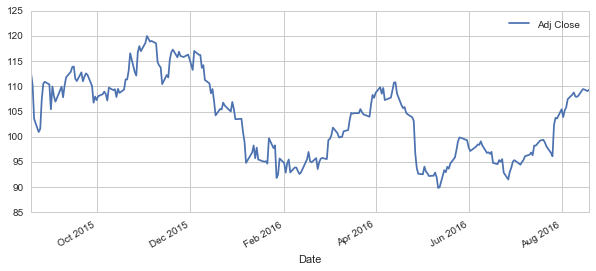

In [15]:
#adjust closing price
AAPL['Adj Close'].plot(legend = True,figsize = (10,4))

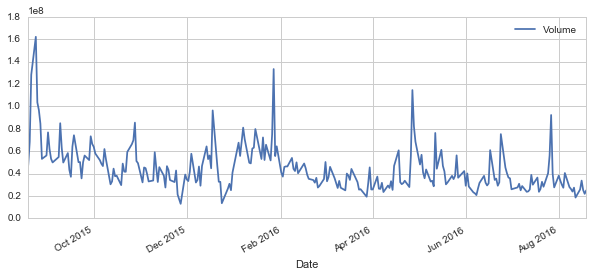

In [16]:
AAPL['Volume'].plot(legend = True,figsize = (10,4))

In [7]:
# Moving averages = weighed price trend
# pd.rolling_mean 
ma_day = [10,20,50]
# Creat 3 new columns
for ma in ma_day:
    column_name = 'MA for %s days' %(str(ma))
    AAPL[column_name] = pd.rolling_mean(AAPL['Adj Close'],ma)

C:\Users\zzhan\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
C:\Users\zzhan\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
C:\Users\zzhan\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()


In [19]:
AAPL[10:20]

,Open,High,Low,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2015-09-02,110.230003,112.339996,109.129997,112.339996,61888800,109.988339,107.108909,NaN,NaN
2015-09-03,112.489998,112.779999,110.040001,110.370003,53233900,108.059584,106.885682,NaN,NaN
2015-09-04,108.970001,110.449997,108.510002,109.269997,49996300,106.982605,107.229333,NaN,NaN
2015-09-08,111.750000,112.559998,110.320000,112.309998,54843600,109.958969,108.129095,NaN,NaN
2015-09-09,113.760002,114.019997,109.769997,110.150002,85010800,107.844189,108.756677,NaN,NaN
2015-09-10,110.269997,113.279999,109.900002,112.570000,62892800,110.213528,109.038648,NaN,NaN
2015-09-11,111.790001,114.209999,111.760002,114.209999,49915500,111.819197,109.164948,NaN,NaN
2015-09-14,116.580002,116.889999,114.860001,115.309998,58363400,112.896168,109.362719,NaN,NaN
2015-09-15,115.930000,116.529999,114.419998,116.279999,43341200,113.845864,109.707350,NaN,NaN


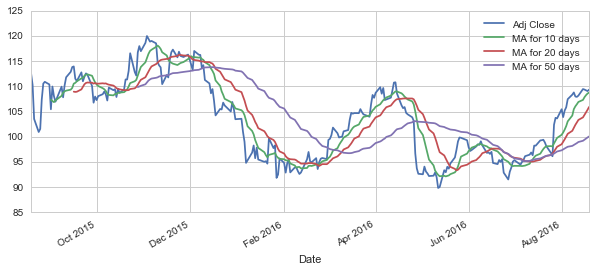

In [21]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days',
      'MA for 50 days']].plot(figsize= (10,4))

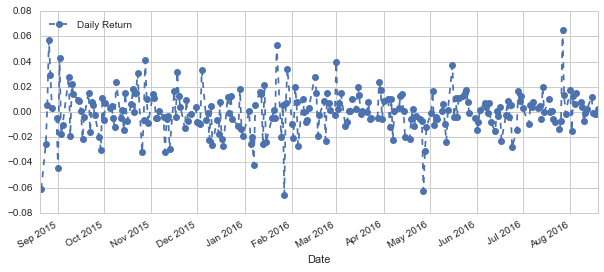

In [8]:
# caculate daliy return
# df.pct_change() = row_now/(row_now-1)
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(10,4),legend = True,
                          linestyle='--',marker = 'o')

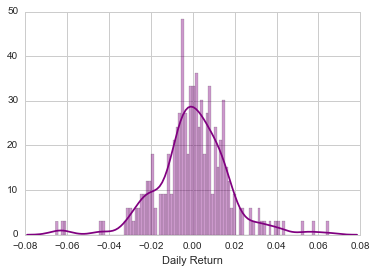

In [27]:
sns.distplot(AAPL['Daily Return'].dropna(),
             bins = 100,color = 'purple')

In [7]:
closing_df = DataReader(tech_list,
                       'yahoo',start,end)['Adj Close']

In [8]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-08-31,110.399553,512.890015,618.250000,42.358340
2015-09-01,105.465056,496.540009,597.789978,40.703716
2015-09-02,109.988339,510.549988,614.340027,42.202611
2015-09-03,108.059584,504.720001,606.250000,42.338873
2015-09-04,106.982605,499.000000,600.700012,41.472630


In [9]:
tech_rets = closing_df.pct_change()

In [10]:
tech_rets = tech_rets.dropna()

In [11]:
tech_rets.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2015-09-01 to 2016-08-26
Data columns (total 4 columns):
AAPL    250 non-null float64
AMZN    250 non-null float64
GOOG    250 non-null float64
MSFT    250 non-null float64
dtypes: float64(4)
memory usage: 9.8 KB


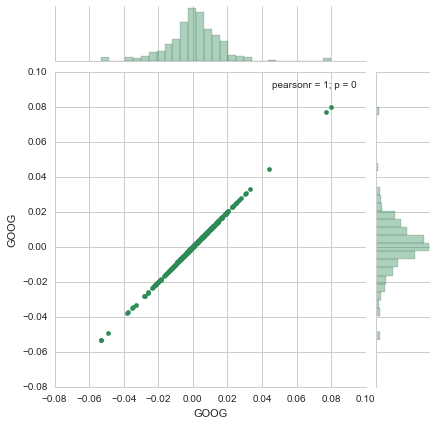

In [43]:
sns.jointplot('GOOG','GOOG',
              data= tech_rets,kind = 'scatter',color = 'seagreen')

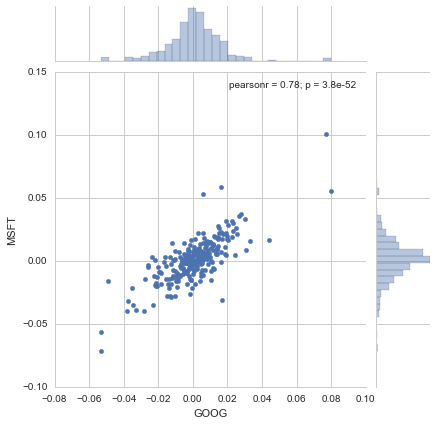

In [44]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

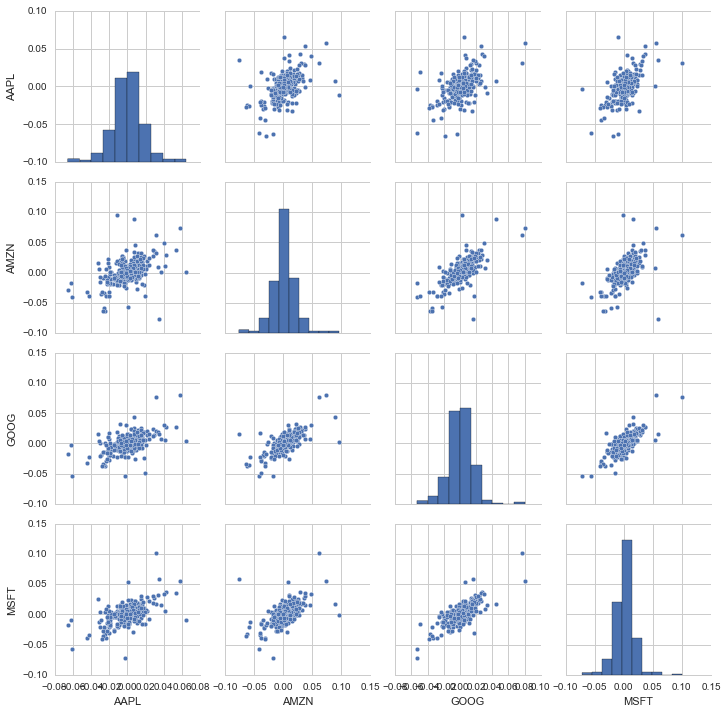

In [45]:
sns.pairplot(tech_rets)

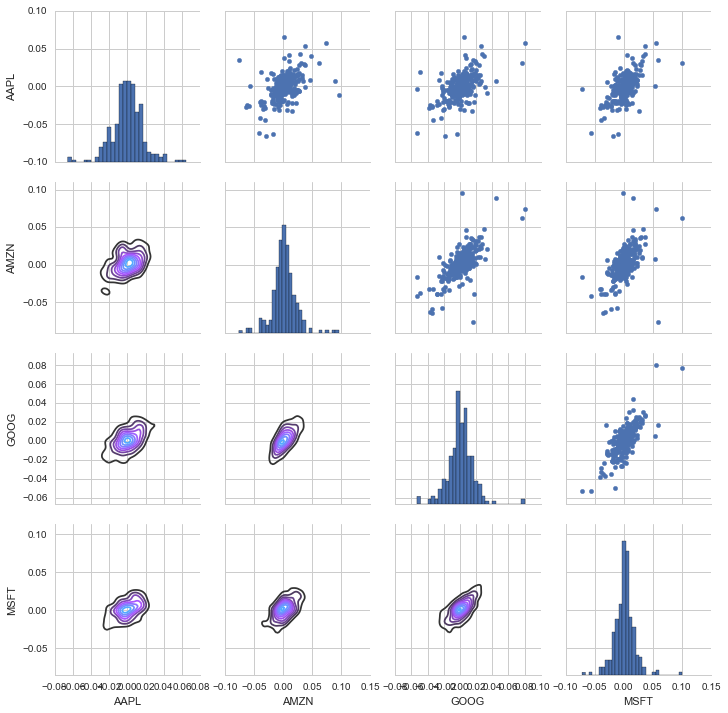

In [47]:
# setting sns.pairplot parameter
returns_fig = sns.PairGrid(tech_rets)
returns_fig.map_upper(plt.scatter)
returns_fig.map_lower(sns.kdeplot,cmap = 'cool_d')
returns_fig.map_diag(plt.hist, bins = 30)

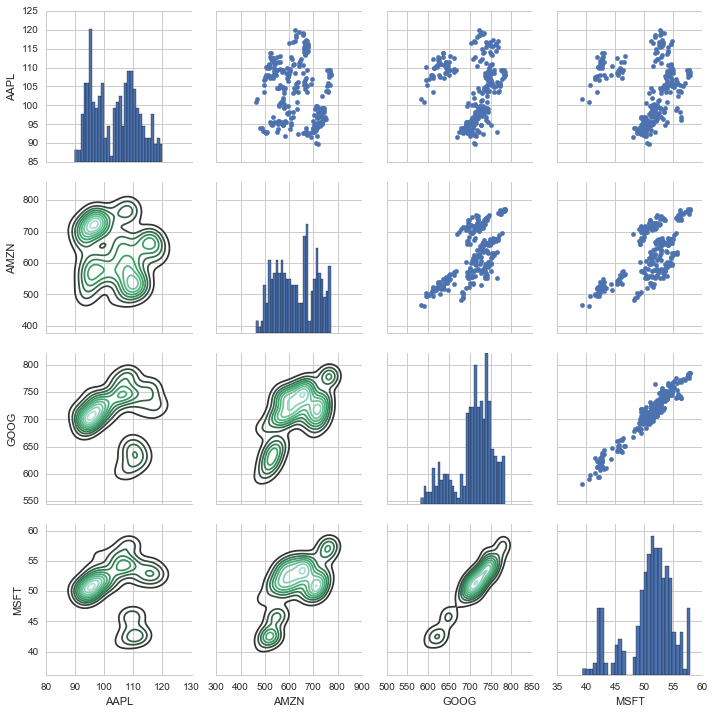

In [48]:
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter)
returns_fig.map_lower(sns.kdeplot)
returns_fig.map_diag(plt.hist, bins = 30)

C:\Users\zzhan\Anaconda2\lib\site-packages\seaborn\linearmodels.py:1285: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
C:\Users\zzhan\Anaconda2\lib\site-packages\seaborn\linearmodels.py:1351: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


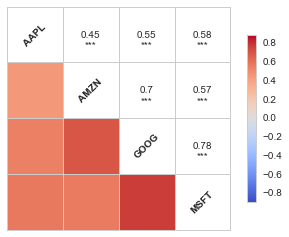

In [49]:
sns.corrplot(tech_rets,annot =True)

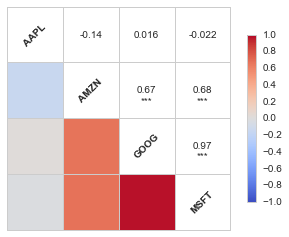

In [50]:
sns.corrplot(closing_df,annot = True)

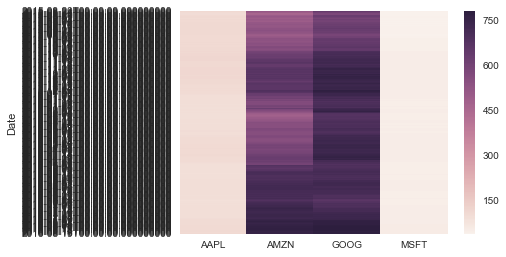

In [13]:
#warning!!! need to reverse the dataframe format before heatmap
#sns.heatmap(closing_df)

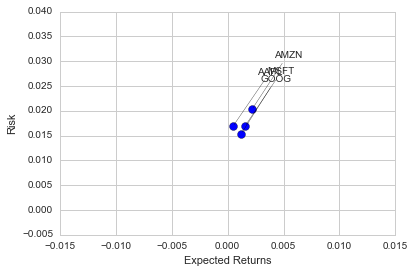

In [13]:
area = np.pi*20
plt.scatter(tech_rets.mean(),tech_rets.std(),s = area)
plt.xlabel('Expected Returns')
plt.ylabel('Risk')

# for annotation, check: http://matplotlib.org/users/annotations_guide.html
for label,x,y in zip(tech_rets.columns,tech_rets.mean(),tech_rets.std()):
    plt.annotate(label,xy = (x,y),xytext = (50,50),
                textcoords = 'offset points',ha = 'right',va = 'bottom',
                arrowprops = dict(arrowstyle = '-',
                                  connectionstyle = 'arc3,rad = 0'))

In [12]:
# Rsik and Returns
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-09-01,-0.044697,-0.031878,-0.033093,-0.039063
2015-09-02,0.042889,0.028215,0.027685,0.036825
2015-09-03,-0.017536,-0.011419,-0.013169,0.003229
2015-09-04,-0.009967,-0.011333,-0.009155,-0.020460
2015-09-08,0.027821,0.037154,0.023239,0.030040


In [17]:
#with 95% confidence, the worst daily loss will not exceed 2.5%
tech_rets['AAPL'].quantile(0.05)

-0.025725597373474567

In [18]:
# Risk Analysis by Monte Carlo method
days = 365

dt = 1/days

mu = tech_rets.mean()['GOOG']
sigma = tech_rets.std()['GOOG']

In [19]:
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in xrange(1,days):
        shock[x] = np.random.normal(loc = mu*dt,scale = sigma*np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1]*(drift[x] + shock[x]))
    return price

In [20]:
GOOG.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-08-31,627.539978,635.799988,617.679993,618.250000,2176700,618.250000
2015-09-01,602.359985,612.859985,594.099976,597.789978,3702100,597.789978
2015-09-02,605.590027,614.340027,599.710022,614.340027,2575600,614.340027
2015-09-03,617.000000,619.710022,602.820984,606.250000,1759600,606.250000
2015-09-04,600.000000,603.469971,595.250000,600.700012,2089000,600.700012


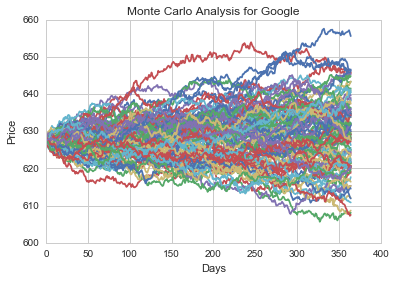

In [21]:
# setting start_price as price on 2015-08-31
start_price = 627.54

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [22]:
runs = 1000
# arrage for 1000 trials, saving the last day price after a year simulations
simulations = np.zeros(runs)

for run in xrange(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

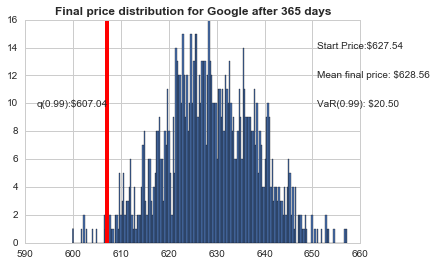

In [26]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins =200)

plt.figtext(0.8,0.8, s='Start Price:$%.2f' %start_price)
plt.figtext(0.8,0.7, 'Mean final price: $%.2f' %simulations.mean())
#Variance of price within 99% confidence interval
plt.figtext(0.8,0.6, 'VaR(0.99): $%.2f' %(start_price - q,))
#Display 1% quantile (the worst 1% situation)
plt.figtext(0.15,0.6,'q(0.99):$%.2f' %q)
plt.axvline(x=q,linewidth = 4,color = 'r')

plt.title('Final price distribution for Google after %s days' %days, weight = 'bold')

In [ ]:
#explanation: Google is a stable stock
#after 1000 times of a year simulations, mean of final price is similar to start price
#In the worst 1% situation, the final price will be $607.04
#Thus, for 99% confidence interval, in the worst situation, we would lost $20.50 for each Google stock 